<a href="https://colab.research.google.com/github/EvilMax/ai-ml/blob/master/m3/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка данных для машинного обучения

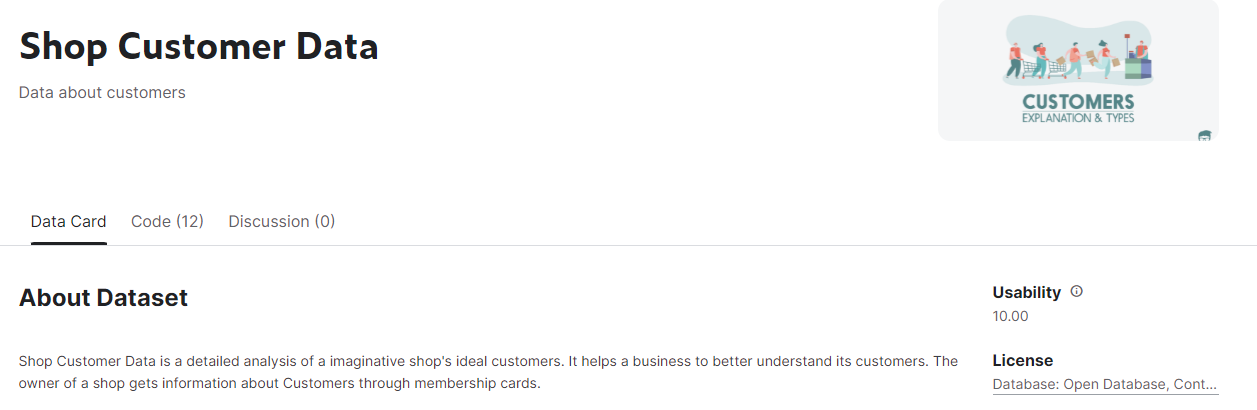

In [152]:
#!rm Customers.csv

#!wget https://raw.githubusercontent.com/NyanBanan/DatasetClean/main/Customers.csv

## Наименование признаков рассматриваемого датасета
Customer ID (идентификатор клиента)

Gender (пол)

Age (возраст)

Annual Income (Годовой доход)

Spending Score (Оценка, присваиваемая магазином на основе поведения клиента и характера расходов)

Profession (профессия)

Work Experience - in years (опыт работы в годах)

Family Size (размер семьи)


In [153]:
import pandas as pd 
import numpy as np 
df = pd.read_csv("https://raw.githubusercontent.com/NyanBanan/DatasetClean/main/Customers.csv") 
df.head() 

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,-1,15000,39,Healthcare,1,4
1,2,Maleee,-21,35000,81,Engineer,3,3
2,3,Female,-20,86000,6,Engineer,1,1
3,4,Femasale,-23,59000,77,Lawyer,0,2
4,5,Female,-31,38000,40,Entertainment,2,6


Характеристики датасета

In [154]:
df.shape # размерность


(2000, 8)

In [155]:
df.info() # покажет информацию о размерности данных 
          # описание индекса, количество not-a-number элементов 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  1997 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


<AxesSubplot:>

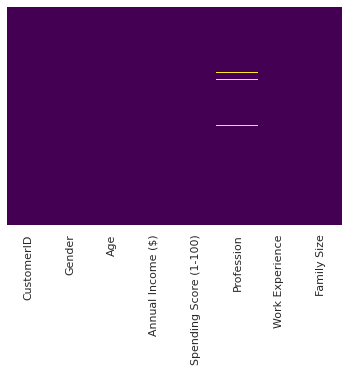

In [156]:
#визуализация отсутствия значений
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [157]:
df.describe() # показывает статистики count,mean, std, min, 25%-50%-75% percentile, max
              # только для числовых значений


,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,-4.995589e+04,110731.821500,50.962500,4.102500,3.768500
std,577.494589,2.236070e+06,45739.536688,27.934661,3.922204,1.970749
min,1.000000,-1.000000e+08,0.000000,0.000000,0.000000,1.000000
25%,500.750000,2.000000e+01,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,4.600000e+01,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,7.200000e+01,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,1.000000e+03,189974.000000,100.000000,17.000000,9.000000


In [158]:
df.nunique() # количество уникальных значений для каждого столбца 

CustomerID                2000
Gender                      12
Age                        159
Annual Income ($)         1786
Spending Score (1-100)     101
Profession                   9
Work Experience             18
Family Size                  9
dtype: int64

In [159]:
#количество каждого уникального значения для каждого столбца в наборе данных
feature_names = df.columns.tolist() 
for column in feature_names: 
    print(column) 
    print("----------------------------------")
    print(df[column].value_counts(dropna=False)) 
    print("==================================")

CustomerID
----------------------------------
1       1
1330    1
1343    1
1342    1
1341    1
       ..
662     1
661     1
660     1
659     1
2000    1
Name: CustomerID, Length: 2000, dtype: int64
Gender
----------------------------------
Female        1175
Male           811
NaN              3
female           2
Maleee           1
Femasale         1
Femadale         1
perosnaVIP       1
Mse              1
Feaae            1
Fefe             1
Nan              1
Fee              1
Name: Gender, dtype: int64
Age
----------------------------------
 52           29
 1            27
 54           27
 63           27
 0            26
              ..
-67            1
-100000050     1
-64            1
-13            1
-90            1
Name: Age, Length: 159, dtype: int64
Annual Income ($)
----------------------------------
50000     7
9000      7
97000     6
85000     6
4000      6
         ..
111859    1
186655    1
164598    1
132951    1
110610    1
Name: Annual Income ($), Length: 17

## Выделение целевой переменной
Выбор целевой переменной зависит от решаемой задачи. Например, анализ соотношения зп и профессии

In [160]:
features = df.drop('Annual Income ($)',1) 
labels = df['Annual Income ($)'] 
print(features.head())

   CustomerID    Gender  Age  Spending Score (1-100)     Profession  \
0           1      Male   -1                      39     Healthcare   
1           2    Maleee  -21                      81       Engineer   
2           3    Female  -20                       6       Engineer   
3           4  Femasale  -23                      77         Lawyer   
4           5    Female  -31                      40  Entertainment   

   Work Experience  Family Size  
0                1            4  
1                3            3  
2                1            1  
3                0            2  
4                2            6  


<ipython-input-160-bee4d19aec72>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features = df.drop('Annual Income ($)',1)


## Чистка датасета 
Столбец «age» содержит людей, которые еще не родились (отрицательные числа).

Существует 12 различных значений для «gender».





### Обработка пропусков данных
Один из способов простых способов решения этой проблемы - просто игнорировать или удалять строки, в которых отсутствуют данные, выбрасывая их из нашего анализа. Однако этот метод может быть плох из-за потери информации.

Еще один способ — это заполнение пропусков, где мы заменяем отсутствующее значение каким-либо образом. Базовые реализации просто заменят все отсутствующие значения средним, медианным, либо же константой.

Для начала необходимо определить что делать с пропущенными значениями, найденными в self_employed и work_interfere. В обоих случаях столбец содержит категориальные данные.

In [161]:
features['Gender'] = features['Gender'].fillna('undefined')

print(features.head)


<bound method NDFrame.head of       CustomerID    Gender  Age  Spending Score (1-100)     Profession  \
0              1      Male   -1                      39     Healthcare   
1              2    Maleee  -21                      81       Engineer   
2              3    Female  -20                       6       Engineer   
3              4  Femasale  -23                      77         Lawyer   
4              5    Female  -31                      40  Entertainment   
...          ...       ...  ...                     ...            ...   
1995        1996    Female   71                      40         Artist   
1996        1997    Female   91                      32         Doctor   
1997        1998      Male   87                      14     Healthcare   
1998        1999      Male   77                       4      Executive   
1999        2000      Male   90                      52  Entertainment   

      Work Experience  Family Size  
0                   1            4  
1      

Посмотрим на статистику пропусков данных по различным переменным

In [162]:
missing_counts = features.isnull().sum()
missing_counts

CustomerID                 0
Gender                     0
Age                        0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

### Поиск неявных дубликатов


In [163]:
male_terms = ["Maleee", "Male", "Mse"] 
female_terms = ["female", "Female", "Femasale", "Femadale", "perosnaVIP", "Feaae", "Fefe", "Fee"] 

def clean_gender(response): 
    if response.lower().rstrip() in male_terms: 
        return "Male" 
    elif response.lower().rstrip() in female_terms: 
        return "Female" 
    else:  
        return "Other" 

features['Gender'] = features["Gender"].apply(lambda x: clean_gender(x)) 
print(features.head())

   CustomerID  Gender  Age  Spending Score (1-100)     Profession  \
0           1   Other   -1                      39     Healthcare   
1           2   Other  -21                      81       Engineer   
2           3  Female  -20                       6       Engineer   
3           4   Other  -23                      77         Lawyer   
4           5  Female  -31                      40  Entertainment   

   Work Experience  Family Size  
0                1            4  
1                3            3  
2                1            1  
3                0            2  
4                2            6  


### Обнаружение выбросов


In [167]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


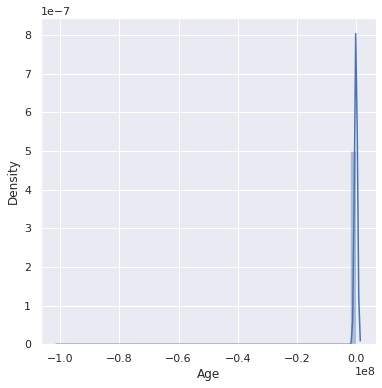

In [168]:
#визуализация распределения возраста
sns.set(color_codes=True) 
plot = sns.distplot(features.Age.dropna()) 
plot.figure.set_size_inches(6,6) # в дюймах

<AxesSubplot:xlabel='Age'>

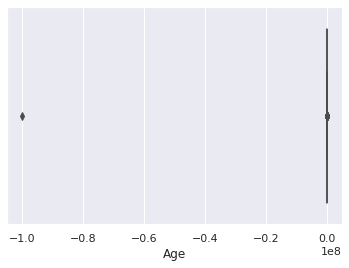

In [169]:
sns.boxplot(x=features.Age.dropna())

In [171]:
features.Age.loc[(features.Age <5) | (features.Age> 100)] = np.nan
print(features.isnull().sum()['Age'])

209


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


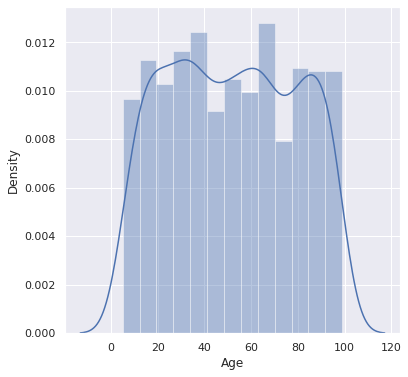

In [172]:
#визуализация распределения возраста
%matplotlib inline   
import seaborn as sns 
sns.set(color_codes=True) 
plot = sns.distplot(features.Age.dropna()) 
plot.figure.set_size_inches(6,6) # в дюймах

0
99.0


<AxesSubplot:xlabel='Age'>

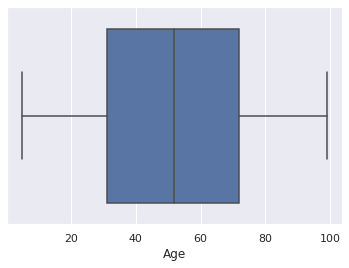

In [173]:
#обработка nan значений, замена их на среднее значение по столбцу
features['Age'] = features['Age'].fillna(features['Age'].mean())
print(features.isnull().sum()['Age'])
print(features.Age.max())
sns.boxplot(x=features.Age.dropna())

### Кодирование данных


In [174]:
features['Profession'].value_counts(dropna=False) 

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
NaN               35
Name: Profession, dtype: int64

In [175]:
#ручное кодирование данных
features['Profession'] = df['Profession'].map({'Artist': 0, 
                               'Healthcare': 1, 
                               'Entertainment': 2, 
                               'Engineer': 3,
                               'Doctor': 4,
                               'Executive':5,
                               'Lawyer':6,
                               'Marketing':7,
                               'Homemaker':8}) 

In [176]:
#автоматическое кодирование 
#Проблема с этим подходом заключается в том, что вводится порядок, который может отсутствовать в исходных данных. 
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(features['Profession']) 
label_encoder.transform(features['Profession']) 


array([1, 3, 3, ..., 1, 5, 2])

In [177]:
#автоматическое кодирование
pd.get_dummies(features['Profession']) 

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1995,1,0,0,0,0,0,0,0,0
1996,0,0,0,0,1,0,0,0,0
1997,0,1,0,0,0,0,0,0,0
1998,0,0,0,0,0,1,0,0,0


### Зависимости в данных
Чтобы каким-либо образом построить модель, желательно исключить взаимозависимости из данных, так как зависимые друг от друга переменные, как минимум увеличивают вычислительные затраты, а порой и мешают построению качественной модели

Прежде чем задаваться вопросом исключения лишних переменных, надо узнать, а как вообще обстоят дела с зависимостью. Нам поможет в этом библиотека seaborn.

                        CustomerID   Age  Spending Score (1-100)  Profession  \
CustomerID                    1.00  0.06                    0.02        0.02   
Age                           0.06  1.00                   -0.03       -0.02   
Spending Score (1-100)        0.02 -0.03                    1.00       -0.05   
Profession                    0.02 -0.02                   -0.05        1.00   
Work Experience               0.09 -0.03                   -0.03        0.03   
Family Size                   0.16  0.04                    0.00        0.01   

                        Work Experience  Family Size  
CustomerID                         0.09         0.16  
Age                               -0.03         0.04  
Spending Score (1-100)            -0.03         0.00  
Profession                         0.03         0.01  
Work Experience                    1.00         0.01  
Family Size                        0.01         1.00  


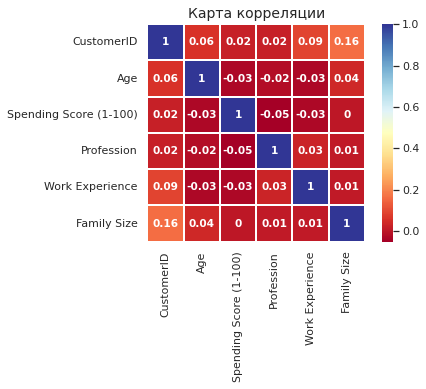

In [178]:
var_corr = round(features.corr(),2)
print(var_corr)
mask = np.zeros_like(var_corr)
sns.heatmap(var_corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("RdYlBu")
                , linewidths=.1)
plt.title('Карта корреляции', fontsize=14)
plt.show()
# plt.colormaps() -  так можно посмотреть доступные цветовые карты

### Нормализация данных

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки.

**Нормализация на стандартное отклонение (StandartScaler)** - используется для изменения размера распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0, а стандартное отклонение – 1.

**Нормализация Min-max** устанавливает наименьшее наблюдаемое значение равным 0, а наибольшее наблюдаемое значение — 1.


In [185]:
#нормализация на стандартное отклонение 
from sklearn.preprocessing import StandardScaler 
scale_features_std = StandardScaler() 
features[['Age']]=scale_features_std.fit_transform(features[['Age']]) 
print(features.head())

   CustomerID  Gender           Age  Spending Score (1-100)  Profession  \
0           1   Other  2.497984e-17                      39         1.0   
1           2   Other  2.497984e-17                      81         3.0   
2           3  Female  2.497984e-17                       6         3.0   
3           4   Other  2.497984e-17                      77         6.0   
4           5  Female  2.497984e-17                      40         2.0   

   Work Experience  Family Size  
0                1            4  
1                3            3  
2                1            1  
3                0            2  
4                2            6  


In [186]:
#нормализация Min-max
features["Age"] = df["Age"]
features['Age'] = features['Age'].fillna(features['Age'].mean())
print(features.head())

from sklearn.preprocessing import MinMaxScaler 
scale_features_mm = MinMaxScaler() 
features[["Age"]] = scale_features_mm.fit_transform(features[["Age"]]) 
print(features.head())

   CustomerID  Gender  Age  Spending Score (1-100)  Profession  \
0           1   Other   -1                      39         1.0   
1           2   Other  -21                      81         3.0   
2           3  Female  -20                       6         3.0   
3           4   Other  -23                      77         6.0   
4           5  Female  -31                      40         2.0   

   Work Experience  Family Size  
0                1            4  
1                3            3  
2                1            1  
3                0            2  
4                2            6  
   CustomerID  Gender      Age  Spending Score (1-100)  Profession  \
0           1   Other  0.99999                      39         1.0   
1           2   Other  0.99999                      81         3.0   
2           3  Female  0.99999                       6         3.0   
3           4   Other  0.99999                      77         6.0   
4           5  Female  0.99999                   

### Разделение данных для обучения и тестирования
Разделение данных на обучающую и тестовую выборку. Выделение тестовой выборки необходимо для понимания того, что модель обучена в достаточной степени (не произошло переобучение или недообучение)

In [ ]:
from sklearn.model_selection import train_test_split 

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state = 0) 

print(features.shape)
print(features_train.shape)
print(features_test.shape)

(2000, 7)
(1600, 7)
(400, 7)
